# Итоговая работа.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline


Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
from sklearn.metrics import pairwise_distances

In [4]:
raitings_cosine = pairwise_distances(raitings, metric='cosine')
raitings_cosine

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [19]:
x = 0
for i in raitings_cosine:
    x=x+1
    y=np.array(i).argmax()
    print(f'Пользователь №{x} наиболее похож на пользователя №{y+1}')

Пользователь №1 наиболее похож на пользователя №7
Пользователь №2 наиболее похож на пользователя №8
Пользователь №3 наиболее похож на пользователя №7
Пользователь №4 наиболее похож на пользователя №5
Пользователь №5 наиболее похож на пользователя №4
Пользователь №6 наиболее похож на пользователя №7
Пользователь №7 наиболее похож на пользователя №3
Пользователь №8 наиболее похож на пользователя №3
Пользователь №9 наиболее похож на пользователя №4
Пользователь №10 наиболее похож на пользователя №7


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=5)

In [10]:
pca.fit(raitings)

PCA(n_components=5)

In [11]:
print(pca.explained_variance_ratio_)

[0.25373748 0.1970209  0.14113306 0.12956371 0.11289928]


In [12]:
print(pca.singular_values_)

[16.91716582 14.90704109 12.61681323 12.08862725 11.28446283]


In [ ]:

Задание 2

Вычислите производную tg^2(sin(x) + cos(2x+3)) в точке x_0=1 (на python и на бумаге).


In [23]:
import math
from scipy.misc import derivative

In [35]:
def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2
derivative(f, 1.0, dx=1e-6 ) #значение производной

55.3859176464222

In [26]:
from sympy import *

In [44]:
x, y = symbols('x y')

In [45]:
gfg_exp = tan(sin(x) + cos(2*x+3))**2

In [53]:
dif = diff(gfg_exp, x)
dif

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [52]:
print(f'Значение производной {dif.evalf(subs={x:1})}')

Значение производной 55.3859176353379



Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.


In [33]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [34]:


x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])



In [35]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

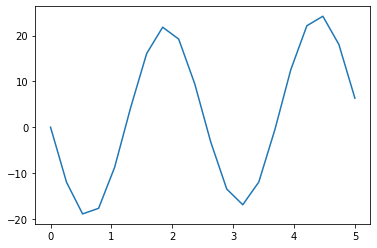

In [36]:
plt.plot(x, fx)
plt.show()

In [37]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [38]:
from scipy.optimize import minimize

In [66]:
a = np.random.randint(0, 5, size = 20)
a

array([0, 1, 3, 3, 1, 2, 4, 1, 3, 1, 4, 0, 3, 4, 1, 2, 3, 1, 1, 0])

In [67]:
b = np.random.randint(-20, 20, size = 20)
b

array([ -7,  10,   2,  -2, -10,  11,  18,  15, -13,  18,   6,  15,  12,
       -16,   2,  -7, -18,   1, -11,  15])

In [68]:
res = minimize(error, (a, b), method='COBYLA', tol=1e-6)
res

     fun: 214.70528716255438
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 903
  status: 1
 success: True
       x: array([[  2.02671472,   0.89964435,   2.7393759 ,   2.87753808,
          0.9849682 ,   2.22235225,   3.92633921,   0.88151825,
          2.88426589,   1.17944927,   4.24238319,   0.35072306,
          3.01367861,   3.37695725,   0.95127148,   2.1928564 ,
          3.34648935,   0.78586127,   1.2196736 ,   0.04533935],
       [ -7.50453375,   9.88861986,   1.76253386,  -2.14581314,
        -10.41306676,  10.83007165,  18.24382652,  15.1077137 ,
        -13.18564397,  17.89388511,   6.22566025,  15.22986699,
         11.65996783, -16.26725143,   1.57024786,  -7.23271623,
        -18.47146237,   1.27135377, -11.26101455,  15.27754606]])

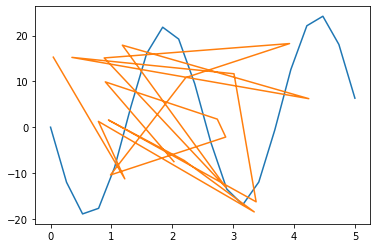

In [69]:
plt.plot(x, fx)
plt.plot(res.x[0], res.x[1])
plt.show()


Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.


In [14]:
value = np.random.randint(1, 100, size = 20)

In [17]:
x = []
for i in range(1000):
    choise = np.random.choice(value, 50)
    mean = np.mean(choise)
    x.append(mean)

(array([  8.,  33.,  76., 178., 224., 222., 159.,  68.,  24.,   8.]),
 array([33.6  , 36.302, 39.004, 41.706, 44.408, 47.11 , 49.812, 52.514,
        55.216, 57.918, 60.62 ]),
 <BarContainer object of 10 artists>)

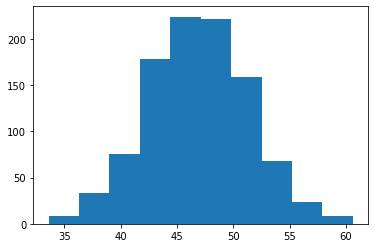

In [20]:
plt.hist(x)


Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):


In [9]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [10]:
from numpy import linalg as LA

In [11]:
w,v = LA.eig(m)

In [12]:
w

array([ 3., -1.])

In [13]:
v

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

(1-h)*(1-h)-4*1=0
1-h-h+h**2-4=0
h**2-2h-3=0 #составил квадратное уравнение
D=2**2-(-4*1*(-3))
D=16
w1=(2-4)/2=-1 #собственное значение 1
w2=(2+4)/2=3  #собственное значение 2

In [ ]:
[1-3, 4]
[1, 1-3]
-2x+4y=0
1x-2y=0
x=2y #собстенный вектор при собственном значении 3

In [ ]:
[1+1, 4]
[1, 1+1]
2x+4y=0
x+2y=0
x=-2y #собстенный вектор при собственном значении -1